In [144]:

# import all lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [145]:
#Load the Iris dataset. Split features (X) and target (y).
iris= load_iris()
X_iris=iris.data
Y_iris=iris.target

# Model KNN

In [146]:
#Split the data into 80% training and 20% testing sets.
X_train , X_test ,y_train , y_test = train_test_split(X_iris , Y_iris , train_size=0.8 , random_state=43)

 Perform feature scaling using StandardScaler.
 
 Question for Reflection: Why is scaling important for KNN but less critical for Logistic Regression?

In [147]:
# KNN	Distances are affected by large numbers — scaling ensures fairness between features
#If one feature (like “income”) has large values and another (like “age”) has small values,
# the large feature will dominate the distance.

#So, the model will think that feature is more important — even if it’s not.
# Scaling (like StandardScaler) puts all features on the same scale,
#so distance is fair and meaningful.
# Logistic Regression	Model learns weights that balance differences — scaling only speeds up training

In [ ]:
# 5. Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Mean = zero , SD = 1
X_test_scaled = scaler.transform(X_test)

In [149]:
model=KNeighborsClassifier(n_neighbors=1)

In [150]:
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [151]:
y_pred=model.predict(X_test_scaled)

In [152]:
acc=accuracy_score(y_test , y_pred)
print(acc*100)

96.66666666666667


In [ ]:

k_values = [1, 3, 5, 7, 9, 11, 15, 20]
accuracy = []  
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)      
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy.append(acc)
    print(f"K = {k} Accuracy : {acc}")

 

K = 1 Accuracy : 0.9666666666666667
K = 3 Accuracy : 0.9666666666666667
K = 5 Accuracy : 0.9333333333333333
K = 7 Accuracy : 0.9666666666666667
K = 9 Accuracy : 0.9666666666666667
K = 11 Accuracy : 1.0
K = 15 Accuracy : 1.0
K = 20 Accuracy : 0.9666666666666667


 so K = 15 , 11 the optimal k value 

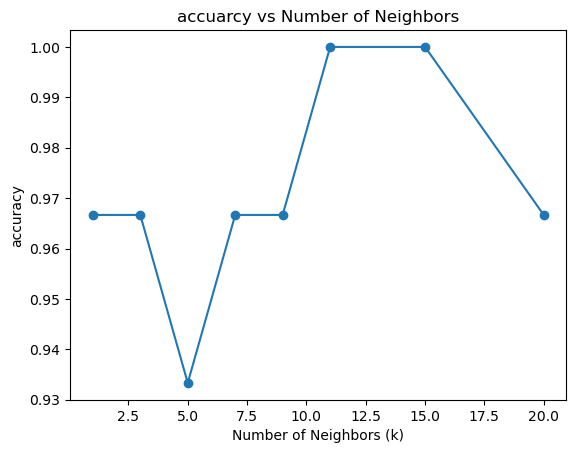

In [154]:
# Plot a graph of accuracy vs. k for the test set.
plt.plot(k_values, accuracy, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('accuracy')
plt.title('accuarcy vs Number of Neighbors')
plt.show()

# Model Logistic regression

In [155]:
X_train , X_test ,y_train , y_test = train_test_split(X_iris , Y_iris , train_size=0.8 , random_state=43)
model2=LogisticRegression(max_iter=300 ,  multi_class='multinomial')
model2.fit(X_train,y_train)
y_predd=model2.predict(X_test)
acc_model2=accuracy_score(y_predd,y_test)
print('accuracy_score :' , acc_model2)
print('Intercept of the model:',model2.intercept_)
print('Coefficient of the line:',model2.coef_)

accuracy_score : 1.0
Intercept of the model: [  9.61565509   2.4449047  -12.06055979]
Coefficient of the line: [[-0.4380536   0.90274809 -2.3747099  -1.02154897]
 [ 0.46116624 -0.30376073 -0.21350513 -0.86255913]
 [-0.02311264 -0.59898735  2.58821504  1.8841081 ]]


c:\Users\Z BOOK\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#Compare the best KNN model and Logistic Regression
#Logistic Regression
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predd, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [157]:
print("(Confusion Matrix):\n", confusion_matrix(y_test, y_predd))

(Confusion Matrix):
 [[13  0  0]
 [ 0  8  0]
 [ 0  0  9]]


In [ ]:
# KNN
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [159]:
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0  8  0]
 [ 0  1  8]]


# Which model performed better? Why might this be the case?

Both models performed perfectly, achieving 100% accuracy.

 Logistic Regression is often slightly preferred because it is a simpler, faster than KNN. 
 
This perfect score happens because the Iris dataset is small and its classes are very easy

# When might KNN be a better choice than Logistic Regression, and vice versa?

KNN : The data has complex, non-linear relationships and small dataset not big.

Logistic:The data has simple, linear relationships and dataset very large , faster


# Could Logistic Regression handle a dataset with 100 features? What challenges might arise?

 Yes,  Logistic Regression is computationally efficient and  can handle a dataset with 100 features

Challenges that might arise:

Overfitting: If the number of data samples is small compared to 100 features, the model can overfit.